# Hacktiv8 Assignment Project 3

Nama : Aziz Fatih Fauzi <br>
Kelas : KS-10

# Bank Marketing Dataset

## 1. Information about Dataset

### 1.1 Context

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### 1.2. Atributes Information

Input variables:
* bank client data: <br> 
1 - age (numeric) <br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') <br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) <br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') <br>
5 - default: has credit in default? (categorical: 'no','yes','unknown') <br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown') <br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown') <br>
* related with the last contact of the current campaign: <br>
8 - contact: contact communication type (categorical: 'cellular','telephone') <br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') <br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri') <br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. <br>
* other attributes: <br>
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) <br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) <br>
14 - previous: number of contacts performed before this campaign and for this client (numeric) <br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') 
social and economic context attributes <br>
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric) <br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric) <br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) <br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric) <br>
20 - nr.employed: number of employees - quarterly indicator (numeric) <br>


Output variable (desired target): <br>
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



## 2. Data Preparation

In [126]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import statsmodels.api as sm

In [44]:
# open data
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [46]:
df.shape

(41188, 21)

In [47]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [48]:
df.index.values

array([    0,     1,     2, ..., 41185, 41186, 41187], dtype=int64)

In [49]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [50]:
df.describe(include = object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [51]:
# Cek kolom yang termasuk categorical
print('Nama Kolom')
for col in df.columns:
    if df[col].dtype=='object':
        print(col, df[col].nunique())

Nama Kolom
job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
poutcome 3
y 2


In [52]:
#mengkategorikan nama kolom berdasarkan tipe data
columns_numerical = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
columns_categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
columns_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
columns_target = ['y']

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## 3. Data Cleaning

In [54]:
# Cek Missing Value
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [55]:
# Ganti isi dataframe yang unknown dengan nan
from numpy import nan

df = df.replace('unknown', nan)
print(df.isnull().sum())

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [56]:
# Karena categorical, isi NaN dengan modus
df['job'].fillna(df['job'].mode()[0], inplace=True)
df['marital'].fillna(df['marital'].mode()[0], inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['default'].fillna(df['default'].mode()[0], inplace=True)
df['housing'].fillna(df['housing'].mode()[0], inplace=True)
df['loan'].fillna(df['loan'].mode()[0], inplace=True)

In [57]:
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [58]:
df.duplicated().any()

True

In [59]:
# jumlah duplikasi data
df.duplicated().sum()

14

In [60]:
# menghapus duplikasi data pada dataset 
df.drop_duplicates()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [61]:
# Mengurutkan index setelah penghapusan
df = df.drop_duplicates().reset_index(drop=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [62]:
df.shape

(41174, 21)

In [63]:
df.duplicated().any()

False

## 4. Visualization

### 4.1 Pie Chart Persentase Client yang Subscribe Deposit

In [64]:
df_deposit = df['y'].value_counts()
df_deposit

no     36535
yes     4639
Name: y, dtype: int64

In [65]:
labels = df['y'].unique()
labels

array(['no', 'yes'], dtype=object)

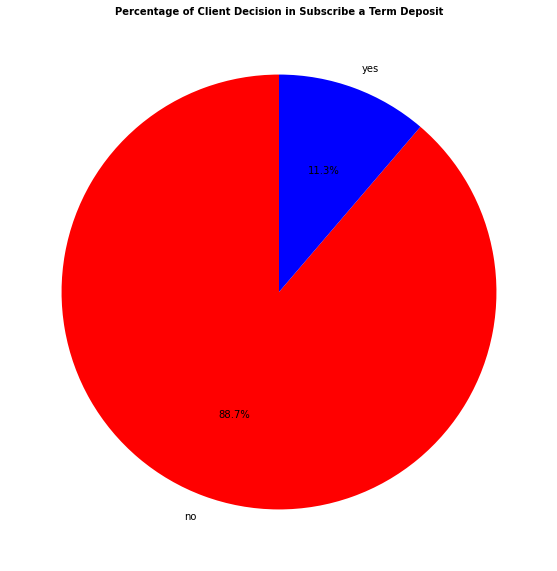

In [66]:
plt.figure(figsize=(10,10))
colors=['red','blue']
font = {'weight': 'bold','size': 10,}
ax = plt.axes()
plt.title('Percentage of Client Decision in Subscribe a Term Deposit', fontdict=font)
ab = plt.pie(df_deposit, labels=labels, colors=colors, startangle=90,autopct='%1.1f%%')
plt.show()

Dari pie chart di atas dapat dilihat bahwa sebanyak 88.7% memilih untuk tidak menggunakan deposito dan hanya 11.3% yang memilih menggunakan deposito.

### 4.2 Bar Chart berdasarkan Education Column dengan melihat banyaknya data di Deposit Column(y)

In [124]:
df_edu = df.groupby('education', axis=0).sum()
df_edu

,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,,,,,,,,,,
0,3033.317865,10730,4139,0,2221,624,1825,17909,8610,1105785,49.736220,72.225779,-218.935071,3947,355.733412,595.156446,236.616066,313.583277,178.384355,428
1,93.659253,5472,2446,0,1222,330,1044,10524,4775,605914,-9.091357,219.334347,-202.826807,2113,217.169841,293.673737,-310.333270,199.770223,243.464012,188
2,-558.282748,15858,6796,0,3302,883,2593,27557,12117,1579509,-77.713124,539.057377,-385.714803,5526,297.748649,497.996646,-1075.915065,267.434833,440.184463,473
3,-1849.950556,37202,11469,1,5150,1443,3587,41733,18945,2482148,3.106932,95.884715,248.937941,8687,-296.838466,150.803940,-898.716484,-357.270697,-269.149198,1031
4,14.641929,48,17,0,10,3,3,59,36,4982,-1.885407,-1.793817,-2.251439,18,-2.465857,-8.034719,2.151176,-1.086321,1.182114,4
5,30.365853,36612,6005,2,2961,793,1765,21003,10542,1323449,35.704459,-48.183062,-104.318234,4920,301.696206,-53.936534,429.335149,267.396052,224.100530,595
6,-763.751596,43794,17255,0,7694,2172,4223,55425,27514,3534430,0.142278,-876.525339,665.108414,13084,-873.043785,-1475.659515,1616.862429,-689.827367,-818.166276,1920


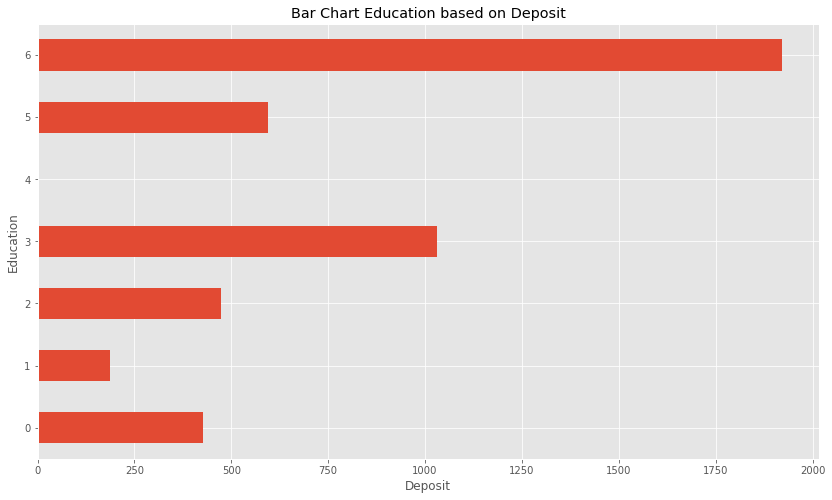

In [128]:
df_edu['y'].plot(kind="barh",figsize =(14,8)) # Generate plot

plt.title('Bar Chart Education based on Deposit') # add title to the plot
plt.ylabel('Education') # add to x-label to the plot
plt.xlabel('Deposit') # add y-label to the plot

plt.show()

c:\Users\AZIZ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


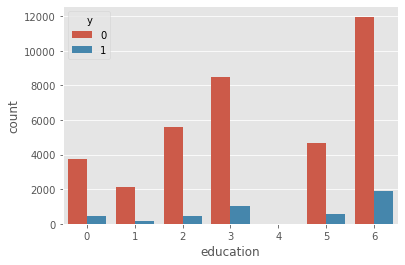

In [130]:
sns.countplot('education', hue='y', data=df)
plt.show()

Yang paling banyak memutuskan untuk subscribe deposito adalah dari kalangan education 6 (University Degree)

### Preprocessing

In [67]:
encoder = preprocessing.LabelEncoder()

In [68]:
for col in columns_categorical:
    df[col] = encoder.fit_transform(df[col]) # mentransformasi data categorical ke data numeric

In [69]:
df['y'] = encoder.fit_transform(df['y'])
    

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41174 entries, 0 to 41173
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41174 non-null  int64  
 1   job             41174 non-null  int32  
 2   marital         41174 non-null  int32  
 3   education       41174 non-null  int32  
 4   default         41174 non-null  int32  
 5   housing         41174 non-null  int32  
 6   loan            41174 non-null  int32  
 7   contact         41174 non-null  int32  
 8   month           41174 non-null  int32  
 9   day_of_week     41174 non-null  int32  
 10  duration        41174 non-null  int64  
 11  campaign        41174 non-null  int64  
 12  pdays           41174 non-null  int64  
 13  previous        41174 non-null  int64  
 14  poutcome        41174 non-null  int32  
 15  emp.var.rate    41174 non-null  float64
 16  cons.price.idx  41174 non-null  float64
 17  cons.conf.idx   41174 non-null 

In [71]:
# scaler numeric coloumns
df[columns_numerical] = StandardScaler().fit_transform(df[columns_numerical])

In [72]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533179,3,1,0,0,0,0,1,6,1,...,-0.565981,0.195448,-0.349561,1,0.64813,0.722627,0.886609,0.712491,0.331719,0
1,1.629144,7,1,3,0,0,0,1,6,1,...,-0.565981,0.195448,-0.349561,1,0.64813,0.722627,0.886609,0.712491,0.331719,0
2,-0.290159,7,1,3,0,1,0,1,6,1,...,-0.565981,0.195448,-0.349561,1,0.64813,0.722627,0.886609,0.712491,0.331719,0
3,-0.002263,0,1,1,0,0,0,1,6,1,...,-0.565981,0.195448,-0.349561,1,0.64813,0.722627,0.886609,0.712491,0.331719,0
4,1.533179,7,1,3,0,0,1,1,6,1,...,-0.565981,0.195448,-0.349561,1,0.64813,0.722627,0.886609,0.712491,0.331719,0


In [73]:
# Memilih dan memisahkan feature dan target

# pilih feature
X = df.drop('y', axis=1)
# pilih target
y = df['y']

In [74]:
# split data 80% training 20% test
X_train, X_test, y_train, y_test = train_test_split(X , y, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

print('Dimensi training feature:', X_train.shape)
print('Dimensi testing feature:', X_test.shape)
print('Dimensi training label:', y_train.shape)
print('Dimensi training label:', y_test.shape)

Dimensi training feature: (32939, 20)
Dimensi testing feature: (8235, 20)
Dimensi training label: (32939,)
Dimensi training label: (8235,)


## 5. Modelling

### 5.1 Logistic Regression

In [81]:
# Modelling
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

c:\Users\AZIZ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
# Skor Akurasi
print(accuracy_score(y_test, y_pred))

0.905525197328476


In [79]:
# confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[7059  195]
 [ 583  398]]


In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7254
           1       0.67      0.41      0.51       981

    accuracy                           0.91      8235
   macro avg       0.80      0.69      0.73      8235
weighted avg       0.89      0.91      0.90      8235



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

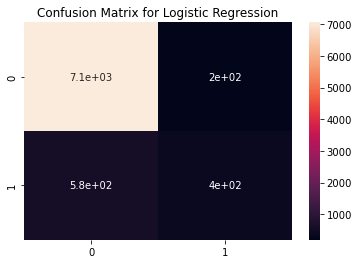

In [103]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.title('Confusion Matrix for Logistic Regression')

Matriks yang diperoleh menunjukkan hasil sebagai berikut:

* 7059 prediksi true negatif 
* 583 prediksi false negatif
* 195 prediksi false positif
* 398 prediksi true positif

Hasil Akurasi menggunakan model Logistic Regression adalah 90,5525 %

### 5.2 K-Nearest Neighbors (KNN)

In [87]:
# Modelling
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_pred1 = model_knn.predict(X_test)

In [88]:
# Skor Akurasi
print(accuracy_score(y_test, y_pred1))

0.8965391621129326


In [90]:
# confusion_matrix
matrix = confusion_matrix(y_test, y_pred1)
print(matrix)

[[7015  239]
 [ 613  368]]


In [91]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7254
           1       0.61      0.38      0.46       981

    accuracy                           0.90      8235
   macro avg       0.76      0.67      0.70      8235
weighted avg       0.88      0.90      0.89      8235



Text(0.5, 1.0, 'Confusion Matrix for KNN')

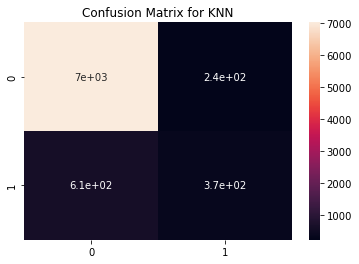

In [102]:
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True)
plt.title('Confusion Matrix for KNN')

Matriks yang diperoleh menunjukkan hasil sebagai berikut:

* 7015 prediksi true negatif 
* 613 prediksi false negatif
* 239 prediksi false positif
* 368 prediksi true positif

Hasil Akurasi menggunakan model KNN adalah 89,6539 %

### 5.3 Support Vector Machine (SVM)

In [94]:
# Modelling
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)

y_pred2 = model_svm.predict(X_test)

In [96]:
# Skor Akurasi
print(accuracy_score(y_test, y_pred2))

0.8868245294474802


In [97]:
# confusion_matrix
matrix = confusion_matrix(y_test, y_pred2)
print(matrix)

[[7141  113]
 [ 819  162]]


In [98]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7254
           1       0.59      0.17      0.26       981

    accuracy                           0.89      8235
   macro avg       0.74      0.57      0.60      8235
weighted avg       0.86      0.89      0.86      8235



Text(0.5, 1.0, 'Confusion Matrix for SVM')

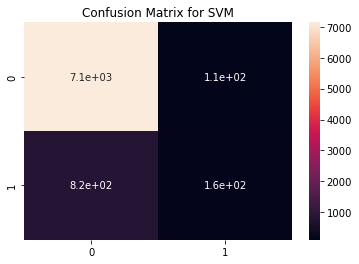

In [101]:
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True)
plt.title('Confusion Matrix for SVM')

Matriks yang diperoleh menunjukkan hasil sebagai berikut:

* 7141 prediksi true negatif 
* 819 prediksi false negatif
* 113 prediksi false positif
* 162 prediksi true positif

Hasil Akurasi menggunakan model SVM adalah 88,6824 %

### 5.4 Decision Tree Classifier

In [104]:
# Modelling
model_dt = tree.DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

y_pred3 = model_dt.predict(X_test)

In [106]:
# Skor Akurasi
print(accuracy_score(y_test, y_pred3))

0.8871888281724347


In [107]:
# confusion_matrix
matrix = confusion_matrix(y_test, y_pred3)
print(matrix)

[[6800  454]
 [ 475  506]]


In [108]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7254
           1       0.53      0.52      0.52       981

    accuracy                           0.89      8235
   macro avg       0.73      0.73      0.73      8235
weighted avg       0.89      0.89      0.89      8235



Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

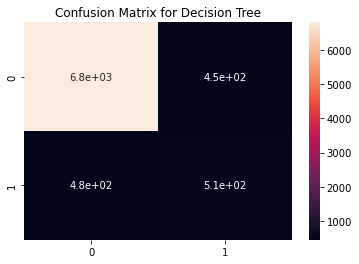

In [109]:
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True)
plt.title('Confusion Matrix for Decision Tree')

Matriks yang diperoleh menunjukkan hasil sebagai berikut:

* 6800 prediksi true negatif 
* 475 prediksi false negatif
* 454 prediksi false positif
* 506 prediksi true positif

Hasil Akurasi menggunakan model Decision Tree adalah 88,7188 %

### 5.5 Random Forest

In [111]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred4 = model_rf.predict(X_test)

In [112]:
# Skor Akurasi
print(accuracy_score(y_test, y_pred4))

0.9129326047358834


In [113]:
# confusion_matrix
matrix = confusion_matrix(y_test, y_pred4)
print(matrix)

[[7013  241]
 [ 476  505]]


In [114]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7254
           1       0.68      0.51      0.58       981

    accuracy                           0.91      8235
   macro avg       0.81      0.74      0.77      8235
weighted avg       0.91      0.91      0.91      8235



Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

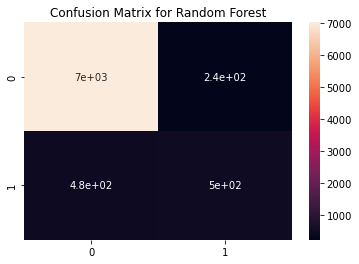

In [115]:
sns.heatmap(confusion_matrix(y_test, y_pred4), annot=True)
plt.title('Confusion Matrix for Random Forest')

Matriks yang diperoleh menunjukkan hasil sebagai berikut:

* 7013 prediksi true negatif 
* 476 prediksi false negatif
* 241 prediksi false positif
* 505 prediksi true positif

Hasil Akurasi menggunakan model Random Forest adalah 91,2932 %

### 5.6 Naive Bayes

In [116]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

y_pred5 = model_nb.predict(X_test)

In [117]:
# Skor Akurasi
print(accuracy_score(y_test, y_pred5))

0.8432301153612629


In [118]:
# confusion_matrix
matrix = confusion_matrix(y_test, y_pred5)
print(matrix)

[[6354  900]
 [ 391  590]]


In [119]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7254
           1       0.40      0.60      0.48       981

    accuracy                           0.84      8235
   macro avg       0.67      0.74      0.69      8235
weighted avg       0.88      0.84      0.86      8235



Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes')

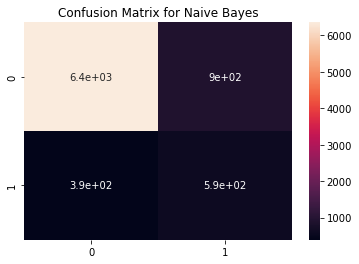

In [121]:
sns.heatmap(confusion_matrix(y_test, y_pred5), annot=True)
plt.title('Confusion Matrix for Naive Bayes')

Matriks yang diperoleh menunjukkan hasil sebagai berikut:

* 6354 prediksi true negatif 
* 391 prediksi false negatif
* 900 prediksi false positif
* 590 prediksi true positif

Hasil Akurasi menggunakan model Naive Bayes adalah 84,3230 %

## 6. Overall Analysis

In [122]:
lg = accuracy_score(y_test, y_pred)
knn = accuracy_score(y_test, y_pred1)
svm = accuracy_score(y_test, y_pred2)
dt = accuracy_score(y_test, y_pred3)
rf = accuracy_score(y_test, y_pred4)
nb = accuracy_score(y_test, y_pred5)

In [123]:
print("Nilai akurasi Logistic Regression:", lg)
print("Nilai akurasi KNN:", knn)
print("Nilai akurasi SVM:", svm)
print("Nilai akurasi Decision Tree:", dt)
print("Nilai akurasi Random Forest:", rf)
print("Nilai akurasi Naive Bayes:", nb)

Nilai akurasi Logistic Regression: 0.905525197328476
Nilai akurasi KNN: 0.8965391621129326
Nilai akurasi SVM: 0.8868245294474802
Nilai akurasi Decision Tree: 0.8871888281724347
Nilai akurasi Random Forest: 0.9129326047358834
Nilai akurasi Naive Bayes: 0.8432301153612629


<tr>
<td> Kesimpulan <br>
<td> 1. Permodelan dengan tingkat nilai akurasi terbaik yaitu pemodelan dengan menggunakan algoritma Random Forest dengan nilai akurasi 91,2932 % 
<td> 2. Permodelan dengan tingkat nilai akurasi terburuk yaitu pemodelan dengan menggunakan algoritma Naive Bayes dengan nilai akurasi 84,3230 %